In [32]:
import keras
import quandl
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

In [33]:
raw_data = quandl.get('BITFINEX/BTCUSD')

## See the data

In [34]:
raw_data.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


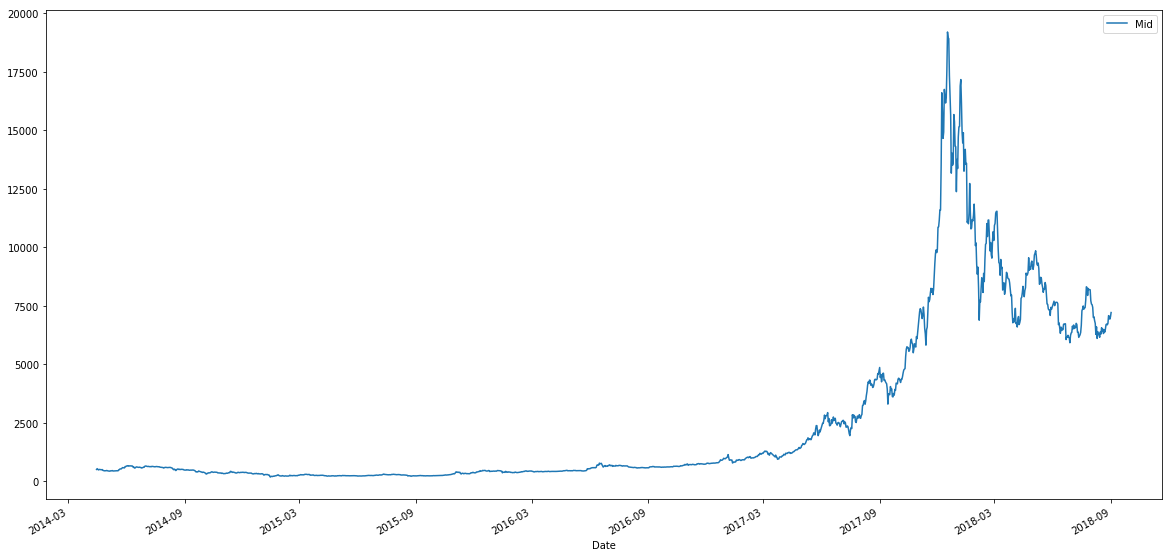

In [35]:
raw_data.drop(['High','Low','Last','Bid','Ask','Volume'],axis=1).plot.line()

## Feat eng

In [36]:
data = raw_data.drop(['High','Low','Last','Bid','Ask'],axis=1)

In [37]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['year'] = data.index.year

In [38]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1568


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


## Le train & Le test
### + feats labels split

In [56]:
train_size = int(len(data) * 0.90)
test_size = len(data) - train_size

In [57]:
label = ['Mid']
feats = [c for c in data.columns if c not in label]

In [58]:
train = data[:train_size]
test = data[train_size:]

In [59]:
len(train), len(test), len(train) + len(test)

(1411, 157, 1568)

In [60]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [61]:
reg = RandomForestRegressor(max_depth=5, random_state=0)

In [62]:
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [64]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 7641643.17
Root Mean squared error: 2764.35
R2 score: -6.76


In [65]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

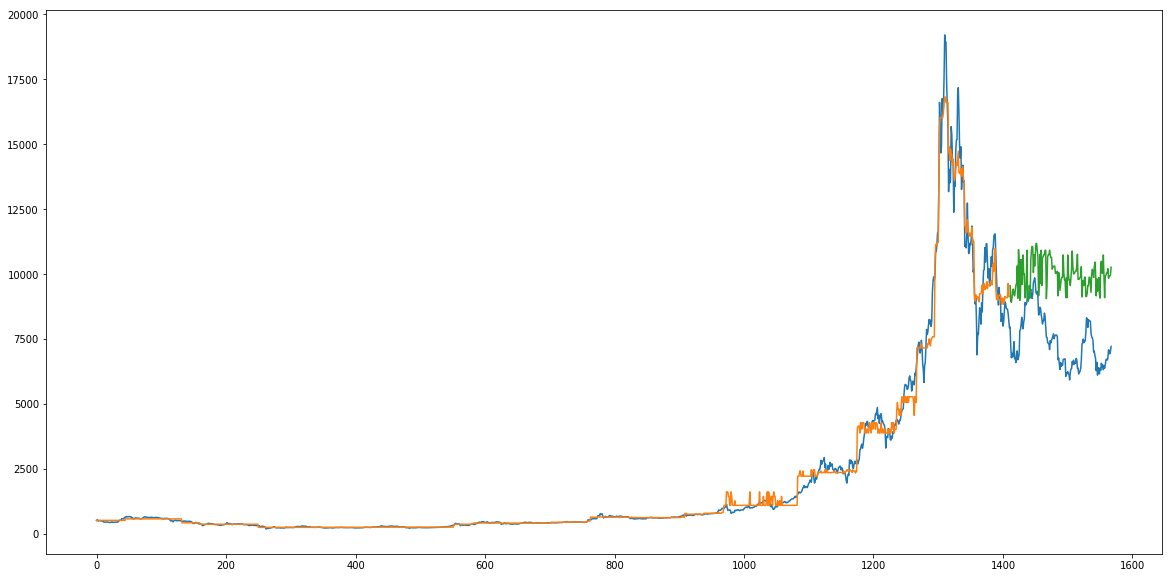

In [66]:
# plot baseline and predictions
plt.plot(raw_data.reset_index().drop(['High','Low','Last','Bid','Ask','Volume','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()